## **Business Problem**

- As a marketing agency, our primary objective is to maximize the return of investment(ROI) for our clients' advertising campaigns. We have conducted two add campaigns, one on Facebook and other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more effectively and optimize our advertising strategies to deliver better outcomes for our clients.

### **Research Question**

- Which ad platform is more effective in terms of conversions, clicks and overall cost-effectiveness?

In [81]:
# Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

import scipy.stats as st 
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

### **Data Description**

- The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019, Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. For each data of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The data includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key features included in the dataset are as follows:

- Date: The date corresponding to each row of campaign data, ranging from january 1st 2019, to December 31st 2019.
- Ad Views: The number of times the ad was viewed.
- Ad Clicks: The number of clicks received on the ad.
- Ad Conversions: The number of conversions resulting from the ad.
- Cost per Ad: The cost associated with running the Facebook ad campaign.
- Click-Through Rat (CTR): The ratio of clicks to views, indicating the effectiveness of the a in generating clicks.
- Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
- Cost per click (CPC): The average cost incurred per click on the ad.

In [2]:
# Loading the dataset
df = pd.read_csv('marketing_campaign.csv')

In [3]:
# data overview
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [4]:
# rows and columns count
df.shape

(365, 17)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [12]:
# Converting data to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# Descriptive stats of the campaigns
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


Audience Reach:
- Google AdWords tends to reach a larger audience on average, with approximately 4717 ad views compared to Facebook Ads' 2179 ad views. This indicates that Google AdWords may have broader reach potential in terms of impressions.

Engagement:
- While Google AdWords achieves higher ad views, Facebook Ads tend to have a higher average click-through rate (CTR). This is evident from Facebook Ads' average of 44 clicks compared to Google AdWords' 60 clicks, despite the difference in ad views. This suggests that Facebook Ads may be more effective in encouraging user engagement and interaction.

Conversion Performance:
- Facebook Ads and Google AdWords both generate conversions, with Facebook Ads averaging around 12 conversions and Google AdWords averaging approximately 6 conversions. Despite Facebook Ads' lower audience reach, it demonstrates a higher conversion rate compared to Google AdWords, indicating potentially better targeting or more compelling ad content.

Variability:
- Both platforms exhibit variability in their performance metrics, with fluctuations observed in ad views, clicks, and conversions over time. However, the variability in Facebook Ads' performance seems slightly higher compared to Google AdWords, as indicated by the wider ranges in the metrics.

Conclusion:
- Based on the provided data, while Google AdWords appears to have a broader reach in terms of ad views, Facebook Ads demonstrate higher engagement and conversion rates. Therefore, the choice between the two platforms may depend on specific campaign objectives. If the goal is to maximize audience exposure, Google AdWords could be preferred. However, if the emphasis is on fostering user engagement and driving conversions, Facebook Ads may be more effective

### **Comparing Campaigns Performance**

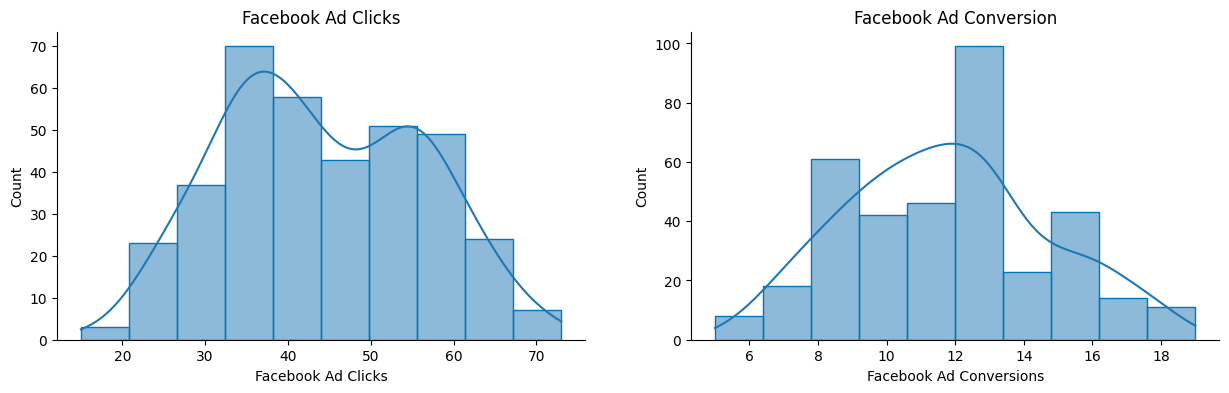

In [23]:
# distribution of the clicks and conversions
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Facebook Ad Clicks'], bins=10, edgecolor = '#0077b6', kde=True)
plt.title('Facebook Ad Clicks')

plt.subplot(1, 2, 2)
sns.histplot(df['Facebook Ad Conversions'], bins=10, edgecolor = '#0077b6', kde=True)
plt.title('Facebook Ad Conversion')

sns.despine()
plt.show()


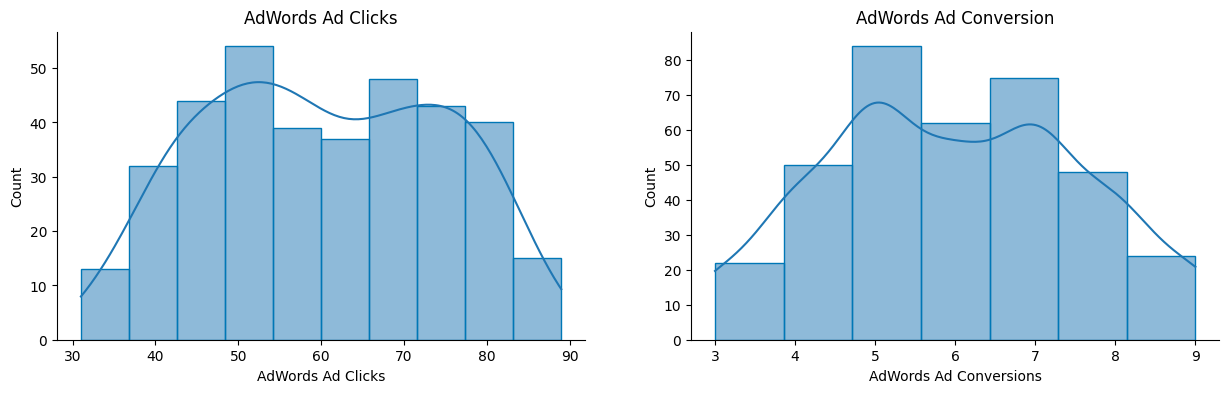

In [25]:
# distribution of the clicks and conversions
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['AdWords Ad Clicks'], bins=10, edgecolor = '#0077b6', kde=True)
plt.title('AdWords Ad Clicks')

plt.subplot(1, 2, 2)
sns.histplot(df['AdWords Ad Conversions'], bins=7, edgecolor = '#0077b6', kde=True)
plt.title('AdWords Ad Conversion')

sns.despine()
plt.show()


All the histogram are showing somewhat symmetrical shape. This symmetrical shape suggest that the number of click and the conversions is relatively evenly distributed. In other words, there are not many clicks or conversions that are outliers on either the high or low end. 

#### **How frequently do we observe days with high numbers of conversions compared to the days with low number of conversions?**

In [35]:
# Creating a function to calculate the category for the conversion
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif conversion >= 6 and conversion < 11:
            category.append('6 - 10')
        elif conversion >= 11 and conversion < 16:
            category.append('10 - 15')
        else:
            category.append('More than 15')

    return category

In [36]:
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [37]:
df[['Facebook Ad Conversions', 'Facebook Conversion Category', 'AdWords Ad Conversions', 'AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [38]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
More than 15     47
less than 6       1
Name: count, dtype: int64

In [41]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6 - 10         209
less than 6    156
Name: count, dtype: int64

Comparison:

**Higher Conversions in Facebook Ads:**
Facebook Ads have a higher number of conversions in the "10 - 15" and "More than 15" categories compared to Google AdWords. This suggests that Facebook Ads may be more effective in generating higher numbers of conversions in these higher ranges.
- Only 1 day had conversions less than 6.

**Higher Conversions in AdWords:**
Google AdWords, on the other hand, has a higher number of conversions in the "6 - 10" category compared to Facebook Ads. This indicates that Google AdWords is more successful in generating 
- 156 days had conversions less than 6.

**conversions within this range.**
Fewer Conversions in Lower Range for Both:
Both platforms have fewer conversions in the lower range categories ("Less than 6"). However, Google AdWords has a higher number of conversions in this category compared to Facebook Ads.

**Conclusion**
Overall, Facebook Ads seem to perform better in generating higher numbers of conversions in the higher range categories, particularly in the "10 - 15" and "More than 15" categories. Google AdWords, on the other hand, excels in generating conversions in the "6 - 10" category. Both platforms have room for improvement in generating conversions in the lower range categories.

In [42]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns={'Facebook Conversion Category': 'Category'})

In [43]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns={'AdWords Conversion Category': 'Category'})

In [44]:
category_df = pd.merge(facebook, adwords, on='Category', how='outer').fillna(0)

In [45]:
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,More than 15,47,0.0
3,less than 6,1,156.0


In [46]:

category_df = category_df.iloc[[3, 1, 0, 2]]

In [47]:
category_df

,Category,count_x,count_y
3,less than 6,1,156.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,More than 15,47,0.0


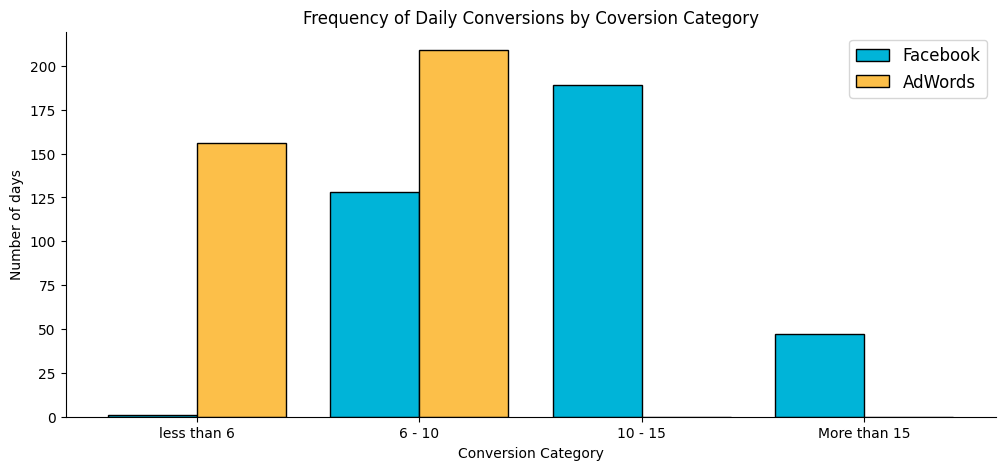

In [60]:
x_axis = np.arange(len(category_df))
plt.figure(figsize=(12, 5))
plt.bar(x_axis - 0.2, category_df['count_x'], 0.4, label='Facebook', color='#00b4d8', linewidth=1, edgecolor='k')
plt.bar(x_axis + 0.2, category_df['count_y'], 0.4, label='AdWords', color='#fcbf49', linewidth=1, edgecolor='k')

plt.title("Frequency of Daily Conversions by Coversion Category")
plt.xticks(x_axis, category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of days")
plt.legend(fontsize=12)

sns.despine()
plt.show()

- The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates or moderate ones(6-10).
- There is a significant variance in the number of high-conversion days between tow campaigns.

Do more clicks on the ad really lead to more sales?

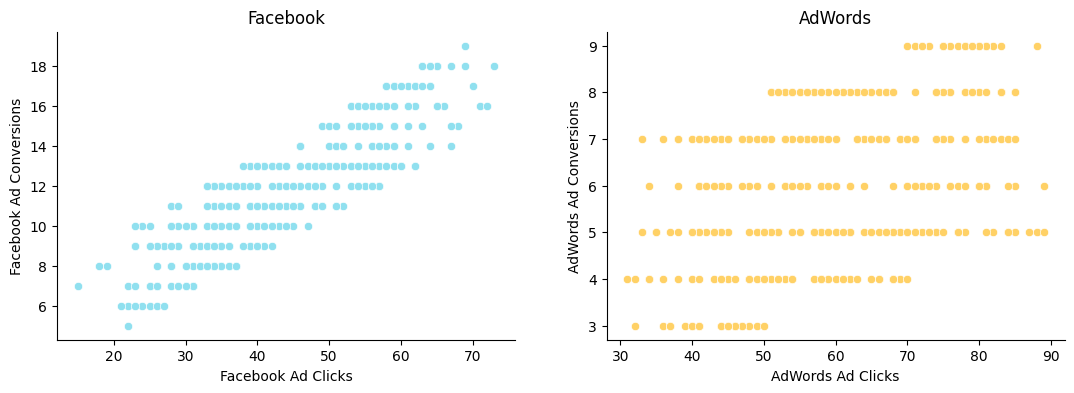

In [66]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.title('Facebook')
sns.scatterplot(x='Facebook Ad Clicks', y='Facebook Ad Conversions', data=df, color='#90e0ef')

plt.subplot(1, 2, 2)
plt.title('AdWords')
sns.scatterplot(x='AdWords Ad Clicks', y='AdWords Ad Conversions', data=df, color='#ffd166')

sns.despine()
plt.show()

In [67]:
facebook_corr = df[['Facebook Ad Conversions', 'Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


- The correlation coefficient between 'Facebook Ad Conversions' and 'Facebook Ad Clicks' is approximately 0.873775.
- This indicates a strong positive correlation between the two variables, as the correlation coefficient is close to 1.

In [70]:
AdWords_corr = df[['AdWords Ad Conversions', 'AdWords Ad Clicks']].corr()[:1]
AdWords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.0,0.447993


- The correlation coefficient of approximately 0.447993 suggests a moderate positive correlation between 'AdWords Ad Conversions' and 'AdWords Ad Clicks'. While there is a positive relationship between the number of AdWords ad conversions and the number of AdWords ad clicks, it is not as strong as the correlation observed in the Facebook ad data

**Conclusion1**
- Investing in Facebook ads is recommended due to the notable correlation coefficient of approximately 0.87 between ad conversions and ad clicks. This high correlation signifies a robust relationship, indicating that as the number of clicks on Facebook ads increases, so does the number of conversions.
- Facebook ads effectively engage users and drive them to take desired actions, resulting in a higher likelihood of achieving conversion goals. Therefore, businesses seeking to optimize their advertising strategies and maximize conversion rates would benefit significantly from investing in Facebook ads.

### **Hypothesis Testing**

**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis (H0):** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

- H0 : μfacebook < μadwords,  states that the population mean of the variable for Facebook ads(μfacebook) is less than the population mean of the variable for AdWords ads(μadwords).

- H0 : μfacebook − μadwords < 0

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from AdWords.

- H1 : μfacebook > μadwords,

- H1 : μfacebook − μadwords > 0

- For comparing means between two independent groups (e.g., Facebook ads vs. AdWords ads), a common choice is the two-sample t-test.

In [75]:
# Print mean conversion rates
print('Mean Conversion:')
print(f'Facebook: {round(df["Facebook Ad Conversions"].mean(), 2)}')
print(f'AdWords: {round(df["AdWords Ad Conversions"].mean(), 2)}\n')

# Perform independent t-test
t_stats, p_value = ttest_ind(a=df['Facebook Ad Conversions'], b=df['AdWords Ad Conversions'], equal_var=False)

print(f'T Statistic: {t_stats}\nP-Value: {p_value}')

Mean Conversion:
Facebook: 11.74
AdWords: 5.98

T Statistic: 32.88402060758184
P-Value: 9.348918164530465e-134


In [77]:
# Set significane level
alpha = 0.5

# Check if p-value is less than alpha
if p_value < alpha:
     print(" - Reject the null hypothesis. There is significant evidence to support the alternative hypothesis.")
else:
    print(" - Fail to reject the null hypothesis. There is not enough evidence to support the alternative hypothesis.")

 - Reject the null hypothesis. There is significant evidence to support the alternative hypothesis.


Based on the t-test conducted between Facebook ad conversions and AdWords ad conversions:

- The extremely low p-value (approximately 9.35e-134) indicates that there is significant evidence to reject the null hypothesis. Therefore, we conclude that Facebook ad conversions significantly outperform AdWords ad conversions. This suggests that businesses may achieve higher conversion rates by investing in Facebook advertising compared to AdWords advertising.

### **Regression Analysis**

- What will happen when i do go with Facebook Ad? How many facebook ad conversion can i expect given a certain number of facebook ad clicks?

In [83]:
# Independent variable
X = df[['Facebook Ad Clicks']]

# Dependent variable
Y = df[['Facebook Ad Conversions']]

In [90]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)


In [100]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [129]:
# Initializing and fitting linear regression Model
reg_model = LinearRegression()

reg_model.fit(xtrain, ytrain)

# Prediction
y_pred = reg_model.predict(xtest)

# Model Evaluation
r2_score_testing = metrics.r2_score(ytest, y_pred)
mse = metrics.mean_squared_error(ytest, y_pred)
print(f"Testing R-squared Score: {round(r2_score_testing * 100, 2)}%")
print("Mean Squared Error:", mse)

Testing R-squared Score: 77.52%
Mean Squared Error: 2.186386803114262


In [149]:
y_pred_values = y_pred.flatten()

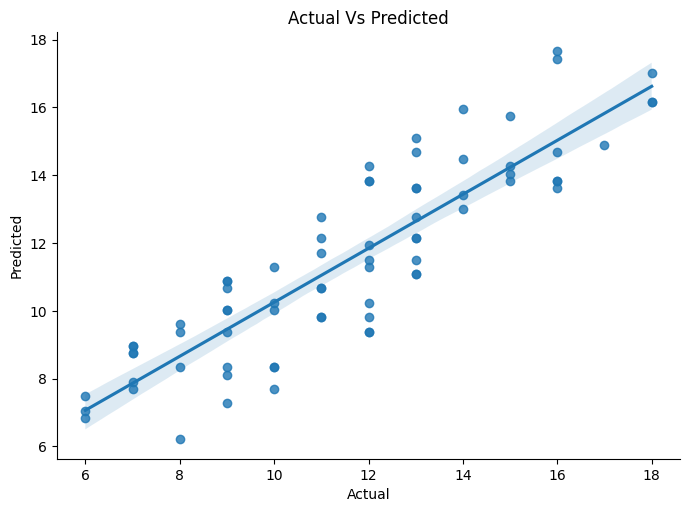

In [158]:
# Create a DataFrame with actual and predicted values
data = {"Actual": ytest, "Predicted": y_pred_values}
data = pd.DataFrame(data)

# Plotting lmplot
sns.lmplot(x="Actual", y="Predicted", data=data, height=5, aspect=1.4)
plt.title("Actual Vs Predicted")
plt.show()

In [171]:
print(f"For {50} Clicks, Expected Conversion: {round(reg_model.predict([[50]])[0][0], 2)}")

print(f"For {80} Clicks, Expected Conversion: {round(reg_model.predict([[80]])[0][0], 2)}")

For 50 Clicks, Expected Conversion: 12.99
For 80 Clicks, Expected Conversion: 19.35


- The [0][0] is used to access the value of the predicted conversion from the predicted 2D array. Since the predict method returns a 2D array with one element, we need to access that element.

The model has a reasonably good predictive power, with and R2 Score of 77%, This suggest that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.

Based on the predictions made by the regression model:

- For 50 clicks, the expected conversion is approximately 13.
- For 80 clicks, the expected conversion is approximately 19.

**Conclusion:**

- For instance, knowing the expected number of Facebook ad Conversions based on number of Facebook ad clicks can help in setting realistic campaign goals, This information can be valuable for making decisions related to marketing strategies, budget allocation, and resource planning to optimize conversion rates.

### **Analyzing Facebook Campaign metrics over time**

In [176]:
df.head(3)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,AdWords Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2019-01-02,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10
2,2019-01-03,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23,6 - 10,less than 6


In [180]:
# Cleaning the data

df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].str.replace('$', '')
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].str.replace('%', '')
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].str.replace('%', '')
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].str.replace('$', '')

In [181]:
df.head(3)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,AdWords Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,126,0.83,42.73,7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2019-01-02,FB_Jan19,3106,36,12,104,1.15,34.04,2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10
2,2019-01-03,FB_Jan19,3105,26,8,102,0.84,31.45,3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23,6 - 10,less than 6


In [190]:
# Filtering data for Facebook campaign
facebook_df = df.iloc[:, :9]

facebook_df = pd.concat([facebook_df, df['Facebook Conversion Category']], axis=1)

In [191]:
facebook_df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),Facebook Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,126,0.83,42.73,7.14,6 - 10
1,2019-01-02,FB_Jan19,3106,36,12,104,1.15,34.04,2.91,10 - 15
2,2019-01-03,FB_Jan19,3105,26,8,102,0.84,31.45,3.89,6 - 10
3,2019-01-04,FB_Jan19,1107,27,9,71,2.45,34.76,2.62,6 - 10
4,2019-01-05,FB_Jan19,1317,15,7,78,1.10,47.59,5.38,6 - 10


#### **At what times of the month or days of the week do we observe the conversions**

In [220]:
# Extracting month and weekday from the date column
facebook_df['Month'] = facebook_df['Date'].dt.month
facebook_df['Week'] = facebook_df['Date'].dt.weekday

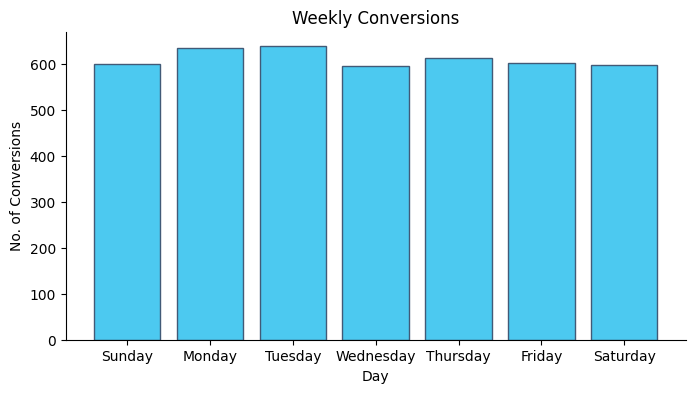

In [221]:
plt.figure(figsize=(8, 4))

weekly_conversions = facebook_df.groupby('Week')[['Facebook Ad Conversions']].sum()
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.bar(day_names, weekly_conversions['Facebook Ad Conversions'], color='#4cc9f0', edgecolor='#415a77')
plt.title('Weekly Conversions')
plt.xlabel('Day')
plt.ylabel('No. of Conversions')
sns.despine()
plt.show()

- The Facebook ad conversions exhibit relatively consistent performance across the week, with conversions ranging from 596 to 639. Despite slight fluctuations, there's no significant trend indicating a clear preference for any specific day, However, Monday and Tuesday demonstrate slightly higher conversion rates, peaking at 635 and 639 respectively.

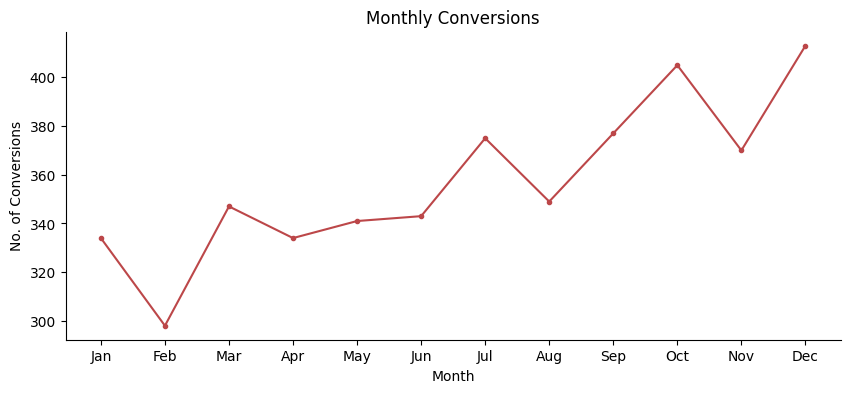

In [222]:
plt.figure(figsize=(10, 4))

monthly_conversions = facebook_df.groupby('Month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(month_names, monthly_conversions['Facebook Ad Conversions'], color='#bc4749', marker='.')
plt.title('Monthly Conversions')
plt.xlabel('Month')
plt.ylabel('No. of Conversions')
sns.despine()
plt.show()

- The Facebook ad conversions fluctuate throughout the year, with varying conversion counts observed across different months. Month 12 stands out with the highest conversion count of 413, followed by months 10 and 9, which also exhibit relatively high conversion rates of 405 and 377 respectively. These months likely correspond to periods of increased user engagement or more effective advertising campaigns.

#### **How does the Cost Per Conversion (CPC) trend over time?**

- Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric help marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

In [247]:
facebook_df['Cost per Facebook Ad'] = facebook_df['Cost per Facebook Ad'].astype('float')
facebook_df['Facebook Click-Through Rate (Clicks / View)'] = facebook_df['Facebook Click-Through Rate (Clicks / View)'].astype('float')
facebook_df['Facebook Conversion Rate (Conversions / Clicks)'] = facebook_df['Facebook Conversion Rate (Conversions / Clicks)'].astype('float')
facebook_df['Facebook Cost per Click (Ad Cost / Clicks)'] = facebook_df['Facebook Cost per Click (Ad Cost / Clicks)'].astype('float')

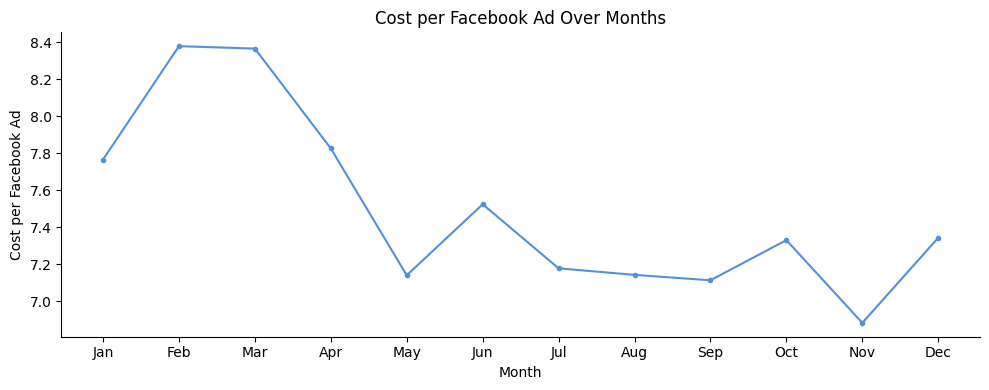

In [259]:
monthly_cpc = facebook_df.groupby('Month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum()

monthly_cpc['Cost per Conversion'] = monthly_cpc['Cost per Facebook Ad'] / monthly_cpc['Facebook Ad Conversions']

plt.figure(figsize=(10, 4))
plt.plot(month_names, monthly_cpc['Cost per Conversion'],  color='#5390d9', marker='.')
plt.title('Cost per Facebook Ad Over Months')
plt.xlabel('Month')
plt.ylabel('Cost per Facebook Ad')
sns.despine()
plt.tight_layout()
plt.show()

- In conclusion, the analysis of the cost per conversion across the months reveals significant variations in effectiveness. November Month stands out as the most efficient period, with a notably low cost per conversion of $6.88. Conversely, Months Feb and Mar exhibit higher costs per conversion, with values of $8.38 and $8.37, respectively. This suggests that advertising efforts were particularly effective in Month Nov, while Months February and March may have experienced challenges or inefficiencies in converting views into actions.